# Рекомендация тарифов

# Импорт библиотек

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.dummy import DummyClassifier

## Открытие и изучение файлов

In [3]:
data = pd.read_csv('/datasets/users_behavior.csv')

Проверим размер датасета

In [4]:
data.shape

(3214, 5)

Проверим заголовки и содержимое

In [5]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Проверим типы данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Проверим общую своднуи информацию по данным

In [7]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


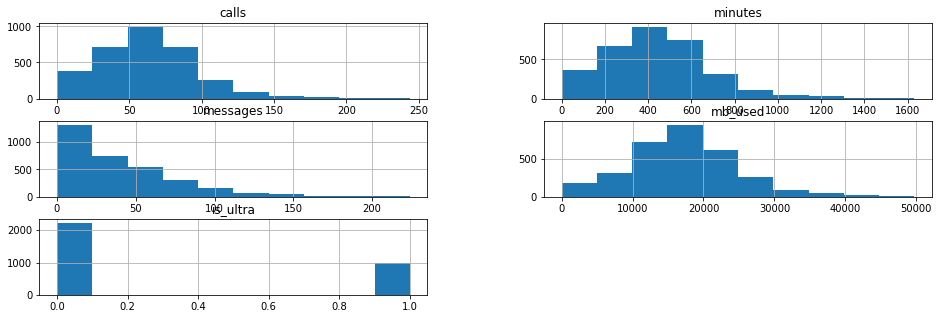

In [8]:
data.hist(figsize=(16,5))
plt.show()

Поменяем тип данных сообщений на целочисленный

In [9]:
data['messages']=data['messages'].astype("int")

Проверим дубликаты

In [10]:
data.duplicated().sum()

0

Данные содержат 3214 строк и 5 столбцов, все значения столбцов численные, сами данные отражают количество звонков, суммарную длительность звонков в минутах, количество sms-сообщений, израсходованный интернет-трафик в Мб, каким тарифом пользовался в течение месяца клиент.

## Разбивка данных на выборки

Так как у нас нет тестовой выборки, разобьем общий датафрейм на и обучающую, валидационную и тестовую выборки в соотношении. 60 : 20 : 20

In [11]:
data_train, data_test = train_test_split(data, test_size=0.4, random_state=12345)
features = data_test.drop('is_ultra', axis=1)
target = data_test['is_ultra']

In [12]:
features_valid, features_test, target_valid, target_test = \
train_test_split(features, target, test_size=0.5, random_state=12345)

In [13]:
features_train = data_train.drop('is_ultra', axis=1)
target_train = data_train['is_ultra']

In [14]:
print('Размер обучающей выборки',features_train.shape)
print('Размер валидационной выборки',features_valid.shape)
print('Размер тестовой',features_test.shape)

Размер обучающей выборки (1928, 4)
Размер валидационной выборки (643, 4)
Размер тестовой (643, 4)


## Исследование моделей

Дерево решений

In [15]:
best_depth = 0
best_accuracy = 0

for depth in range(1,16):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    accuracy = model.score(features_valid, target_valid)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
print("Лучшая лубина дерева:", best_depth,)
print("Accuracy:", best_accuracy)

Лучшая лубина дерева: 3
Accuracy: 0.7853810264385692


Случайный лес

In [16]:
best_depth = 0
best_accuracy = 0

for depth in range(1,16):
    for est in range(5,51,5):
        for sample in range(2,5):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, 
                                           min_samples_leaf=sample, random_state=12345)
            model.fit(features_train, target_train)
            accuracy = model.score(features_valid, target_valid)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_depth = depth
                best_est = est
                best_sample = sample
print("Лучшая глубина дерева:", best_depth)
print("Лучшее количество деревьев:", best_est)
print("Лучший минимум объектов в узле:", best_sample)
print("Accuracy:", best_accuracy)

Лучшая глубина дерева: 6
Лучшее количество деревьев: 35
Лучший минимум объектов в узле: 2
Accuracy: 0.8087091757387247


Логистическая регрессия

In [17]:
model = LogisticRegression(solver='lbfgs')
model.fit(features_train, target_train)
accuracy = model.score(features_valid, target_valid)
print("Accuracy:", accuracy)

Accuracy: 0.7107309486780715


Вывод:
- Дерево решений : 
        Лучшая лубина дерева: 3
        Accuracy: 0.7853810264385692
- Случайный лес
        Лучшая глубина дерева: 6
        Лучшее количество деревьев: 35
        Лучший минимум объектов в узле: 2
        Accuracy: 0.8087091757387247
- Логистическая регрессия:
        Accuracy: 0.7107309486780715
        
Лучше всего показал себя случайный лес с параметрами, указанными выше.

## Проверка модели на тестовой выборке

Проверим лучшую модель с лучшими гиперпараметрами на тестовой выборке

Случайный лес

In [19]:
model = RandomForestClassifier(max_depth=6, n_estimators=35, min_samples_leaf=2, random_state=12345)
model.fit(features_train, target_train)
test_predict = model.predict(features_test)
accuracy = accuracy_score(test_predict, target_test)
print("Accuracy:", accuracy)

Accuracy: 0.7962674961119751


Вывод: Точность удовлетворяет условиям задачи.

## Проверка модели на адекватность

In [149]:
model = LogisticRegression(solver='lbfgs')
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print("Accuracy:", accuracy)

Accuracy: 0.6842923794712286


In [ ]:
model = RandomForestClassifier(max_depth=6, n_estimators=35, min_samples_leaf=2, random_state=12345)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print("Accuracy:", accuracy)

In [ ]:
dmb = DummyClassifier(strategy="stratified" ,random_state=12345)
dmb.fit(features_train, target_train)
acc = dmb.score(features_test, target_test)
print("Качество наивного прогноза :", acc)
print("Качество нашего прогноза :", accuracy)

In [ ]:
dmb = DummyClassifier(strategy='most_frequent', random_state=12345)
dmb.fit(features_train, target_train)
acc = dmb.score(features_test, target_test)
print("Качество наивного прогноза :", acc)
print("Качество нашего прогноза :", accuracy)

In [ ]:
dmb = DummyClassifier(strategy='uniform', random_state=12345)
dmb.fit(features_train, target_train)
acc = dmb.score(features_test, target_test)
print("Качество наивного прогноза :", acc)
print("Качество нашего прогноза :", accuracy)

In [ ]:
dmb = DummyClassifier(strategy='prior', random_state=12345)
dmb.fit(features_train, target_train)
acc = dmb.score(features_test, target_test)
print("Качество наивного прогноза :", acc)
print("Качество нашего прогноза :", accuracy)

Вывод:
    Были изучен и обработан датасет о поведении клиентов, на основе его проверены  3 модели: дерево решений, случайный лес и логистическая регрессия. Лучше всего себя показал случайный лес с параметрами : глубина дерева - 6,количество деревьев = 35, мин. обьектов в узле - 2. При этом доля правильных ответов составила 0,796 на тестовой выборке.